<a href="https://colab.research.google.com/github/iamdas3/Machine-Learning/blob/master/OCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
!pip uninstall opencv-python

In [13]:
!pip install pytesseract

In [32]:
! apt install tesseract-ocr

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 33 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 1s (4,231 kB/s)
Selecting previously unselect

In [33]:
! apt install libtesseract-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libleptonica-dev
The following NEW packages will be installed:
  libleptonica-dev libtesseract-dev
0 upgraded, 2 newly installed, 0 to remove and 33 not upgraded.
Need to get 2,755 kB of archives.
After this operation, 13.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libleptonica-dev amd64 1.75.3-3 [1,308 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libtesseract-dev amd64 4.00~git2288-10f4998a-2 [1,447 kB]
Fetched 2,755 kB in 1s (2,893 kB/s)
Selecting previously unselected package libleptonica-dev.
(Reading database ... 144426 files and directories currently installed.)
Preparing to unpack .../libleptonica-dev_1.75.3-3_amd64.de

In [100]:
!wget --no-check-certificate \
    https://github.com/ZER-0-NE/EAST-Detector-for-text-detection-using-OpenCV/raw/master/frozen_east_text_detection.pb \
    -O /tmp/frozen_east_text_detection.pb

--2020-07-11 14:01:31--  https://github.com/ZER-0-NE/EAST-Detector-for-text-detection-using-OpenCV/raw/master/frozen_east_text_detection.pb
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/ZER-0-NE/EAST-Detector-for-text-detection-using-OpenCV/master/frozen_east_text_detection.pb [following]
--2020-07-11 14:01:31--  https://raw.githubusercontent.com/ZER-0-NE/EAST-Detector-for-text-detection-using-OpenCV/master/frozen_east_text_detection.pb
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 96662756 (92M) [application/octet-stream]
Saving to: ‘/tmp/frozen_east_text_detection.pb’

/tmp/frozen_east_te 100%[

In [167]:
!wget --no-check-certificate \
    https://images-na.ssl-images-amazon.com/images/I/719eRGIkezL._AC_SX679._SX._UX._SY._UY_.jpg \
    -O /tmp/719eRGIkezL._AC_SX679._SX._UX._SY._UY_.jpg

--2020-07-11 14:23:11--  https://images-na.ssl-images-amazon.com/images/I/719eRGIkezL._AC_SX679._SX._UX._SY._UY_.jpg
Resolving images-na.ssl-images-amazon.com (images-na.ssl-images-amazon.com)... 151.101.1.16, 151.101.65.16, 151.101.129.16, ...
Connecting to images-na.ssl-images-amazon.com (images-na.ssl-images-amazon.com)|151.101.1.16|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25484 (25K) [image/jpeg]
Saving to: ‘/tmp/719eRGIkezL._AC_SX679._SX._UX._SY._UY_.jpg’

/tmp/719eRGIkezL._A 100%[===================>]  24.89K  --.-KB/s    in 0.01s   

2020-07-11 14:23:11 (1.94 MB/s) - ‘/tmp/719eRGIkezL._AC_SX679._SX._UX._SY._UY_.jpg’ saved [25484/25484]



In [168]:
import pytesseract

In [169]:
import imutils

In [170]:
import cv2

In [171]:
from imutils.object_detection import non_max_suppression
import numpy as np

In [172]:
IMAGE_PATH = '/tmp/719eRGIkezL._AC_SX679._SX._UX._SY._UY_.jpg'
min_confidence = 0.05
EAST_PATH = '/tmp/frozen_east_text_detection.pb'
NEW_WIDTH = 512
NEW_HEIGHT = 512
PADDING = 0.05

In [173]:
def decode_predictions(scores, geometry):
  (numRows, numCols) = scores.shape[2:4]
  rects = []
  confidences = []

  for y in range(0, numRows):
    scoresData = scores[0, 0, y]
    xData0 = geometry[0, 0, y]
    xData1 = geometry[0, 1, y]
    xData2 = geometry[0, 2, y]
    xData3 = geometry[0, 3, y]
    anglesData = geometry[0, 4, y]

    for x in range(0, numCols):
      if scoresData[x]<min_confidence:
        continue
      
      (offsetX, offsetY) = (x*4.0, y*4.0)
      angle = anglesData[x]
      cos = np.cos(angle)
      sin = np.sin(angle)
      h = xData0[x] + xData2[x]
      w = xData1[x] + xData3[x]
      endX = int(offsetX + (cos*xData1[x])+(sin*xData2[x]))
      endY = int(offsetY - (sin*xData1[x])+(cos*xData2[x]))
      startX = int(endX-w)
      startY = int(endY-h)

      rects.append((startX, startY, endX, endY))
      confidences.append(scoresData[x])

  return (rects, confidences)

In [174]:
image = cv2.imread(IMAGE_PATH)
orig = image.copy()
(origH, origW) = image.shape[:2]

In [175]:
(newW, newH) = (NEW_WIDTH, NEW_HEIGHT)
rW = origW / float(newW)
rH = origH / float(newH)

In [176]:
image = cv2.resize(image, (newW, newH))
(H, W) = image.shape[:2]

In [177]:
layerNames = ['feature_fusion/Conv_7/Sigmoid',
              'feature_fusion/concat_3']

In [178]:
print("loading EAST text detector")
net = cv2.dnn.readNet('/tmp/frozen_east_text_detection.pb')

loading EAST text detector


In [179]:
blob = cv2.dnn.blobFromImage(image, 1.0, (W, H),
                             (123.68, 116.78, 103.94), swapRB=True, crop=False)
net.setInput(blob)
(scores, geometry) = net.forward(layerNames)

In [180]:
(rects, confidences) = decode_predictions(scores, geometry)
boxes = non_max_suppression(np.array(rects), probs=confidences)

In [181]:
results = []

In [182]:
for (startX, startY, endX, endY) in boxes:
  startX = int(startX*rW)
  startY = int(startY*rH)
  endX = int(endX*rW)
  endY = int(endY*rH)

  dX = int((endX - startX)*PADDING)
  dY = int((endY - startY)*PADDING)

  startX = max(0, startX-dX)
  startY = max(0, startY-dY)
  endX = min(origW, endX+(dX*2))
  endY = min(origH, endY+(dY*2))

  roi = orig[startY:endY, startX:endX]

  #config = ("-l eng --oem 1 --psm 7")
  text = pytesseract.image_to_string(roi)#, config=config)

  results.append(((startX, startY, endX, endY), text))

results = sorted(results, key=lambda r:r[0][1])

In [183]:
from google.colab.patches import cv2_imshow

OCR TEXT
adidas



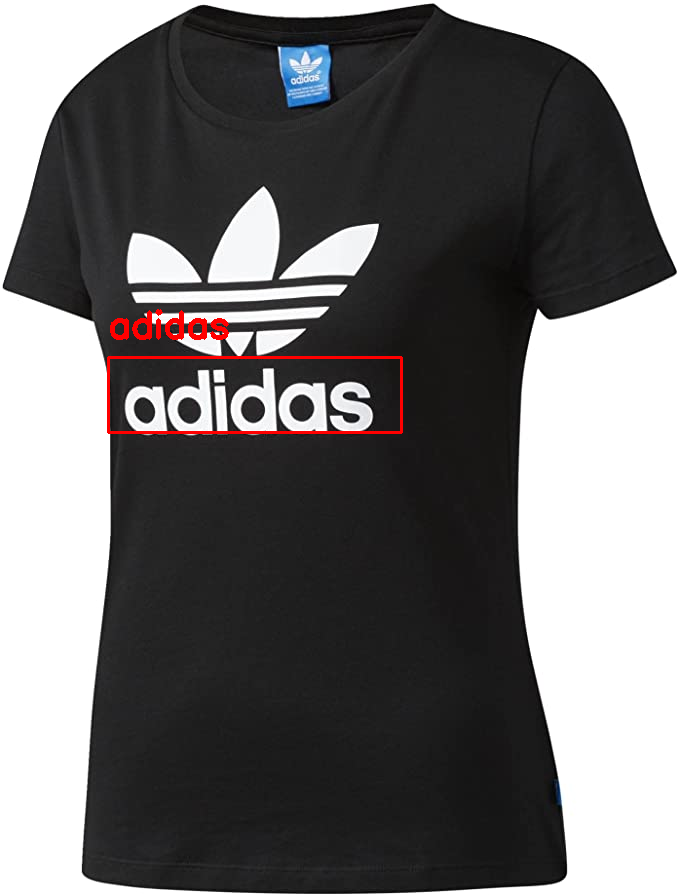

In [184]:
for ((startX, startY, endX, endY), text) in results:
  print("OCR TEXT")
  print("=========")
  print("{}\n".format(text))

  text = "".join([c if ord(c) <128 else "" for c in text]).strip()
  output = orig.copy()
  cv2.rectangle(output, (startX, startY), (endX, endY), (0, 0, 255), 2)
  cv2.putText(output, text, (startX, startY-20), cv2.FONT_HERSHEY_SIMPLEX, 1.2, (0,0,255), 3)
  cv2_imshow(output)
  cv2.waitKey(0)